In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Final 3.success.csv") 
pd.options.display.max_columns = None

In [3]:
df.set_index('movie_id')

,title,movie_title_length,character_name,cast_gender,actor_name,genre,keywords,overview,popularity,production_company,release_month,release_year,runtime,tagline,vote_average,vote_count,budget,revenue,profit,profit_margin,success
movie_id,,,,,,,,,,,,,,,,,,,,,
19995,Avatar,6,Jake Sully,2.0,Sam Worthington,Action,culture clash,"In the 22nd century, a paraplegic Marine is di...",150,Ingenious Film Partners,12,2009,162,Enter the World of Pandora.,7.2,11800,237000000,2787965087,2550965087,11.76,1
285,Pirates of the Caribbean: At World's End,40,Captain Jack Sparrow,2.0,Johnny Depp,Adventure,ocean,"Captain Barbossa, long believed to be dead, ha...",139,Walt Disney Pictures,5,2007,169,"At the end of the world, the adventure begins.",6.9,4500,300000000,961000000,661000000,3.20,1
49026,The Dark Knight Rises,21,Bruce Wayne / Batman,2.0,Christian Bale,Action,dc comics,Following the death of District Attorney Harve...,112,Legendary Pictures,7,2012,165,The Legend Ends,7.6,9106,250000000,1084939099,834939099,4.34,1
49529,John Carter,11,John Carter,2.0,Taylor Kitsch,Action,based on novel,"John Carter is a war-weary, former military ca...",44,Walt Disney Pictures,3,2012,132,"Lost in our world, found in another.",6.1,2124,260000000,284139100,24139100,1.09,1
559,Spider-Man 3,12,Peter Parker / Spider-Man,2.0,Tobey Maguire,Fantasy,dual identity,The seemingly invincible Spider-Man goes up ag...,116,Columbia Pictures,5,2007,139,The battle within.,5.9,3576,258000000,890871626,632871626,3.45,1
38757,Tangled,7,Flynn Rider (voice),2.0,Zachary Levi,Animation,hostage,When the kingdom's most wanted-and most charmi...,49,Walt Disney Pictures,11,2010,100,They're taking adventure to new lengths.,7.4,3330,260000000,591794936,331794936,2.28,1
99861,Avengers: Age of Ultron,23,Tony Stark / Iron Man,2.0,Robert Downey Jr.,Action,marvel comic,When Tony Stark tries to jumpstart a dormant p...,134,Marvel Studios,4,2015,141,A New Age Has Come.,7.3,6767,280000000,1405403694,1125403694,5.02,1
209112,Batman v Superman: Dawn of Justice,34,Bruce Wayne / Batman,2.0,Ben Affleck,Action,dc comics,Fearing the actions of a god-like Super Hero l...,156,DC Comics,3,2016,151,Justice or revenge,5.7,7004,250000000,873260194,623260194,3.49,1
1452,Superman Returns,16,Superman / Clark Kent,2.0,Brandon Routh,Adventure,saving the world,Superman returns to discover his 5-year absenc...,58,DC Comics,6,2006,154,NaN,5.4,1400,270000000,391081192,121081192,1.45,1


In [4]:
df = df[df.budget != 0]

In [5]:
df["profit_margin"] = pd.to_numeric(df["profit_margin"])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 3097
Data columns (total 22 columns):
movie_id              2548 non-null int64
title                 2548 non-null object
movie_title_length    2548 non-null int64
character_name        2542 non-null object
cast_gender           2545 non-null float64
actor_name            2545 non-null object
genre                 2548 non-null object
keywords              2453 non-null object
overview              2548 non-null object
popularity            2548 non-null int64
production_company    2512 non-null object
release_month         2548 non-null int64
release_year          2548 non-null int64
runtime               2548 non-null int64
tagline               2331 non-null object
vote_average          2548 non-null float64
vote_count            2548 non-null int64
budget                2548 non-null int64
revenue               2548 non-null int64
profit                2548 non-null int64
profit_margin         2548 non-null float

In [7]:
df

,movie_id,title,movie_title_length,character_name,cast_gender,actor_name,genre,keywords,overview,popularity,production_company,release_month,release_year,runtime,tagline,vote_average,vote_count,budget,revenue,profit,profit_margin,success
0,19995,Avatar,6,Jake Sully,2.0,Sam Worthington,Action,culture clash,"In the 22nd century, a paraplegic Marine is di...",150,Ingenious Film Partners,12,2009,162,Enter the World of Pandora.,7.2,11800,237000000,2787965087,2550965087,11.76,1
1,285,Pirates of the Caribbean: At World's End,40,Captain Jack Sparrow,2.0,Johnny Depp,Adventure,ocean,"Captain Barbossa, long believed to be dead, ha...",139,Walt Disney Pictures,5,2007,169,"At the end of the world, the adventure begins.",6.9,4500,300000000,961000000,661000000,3.20,1
2,49026,The Dark Knight Rises,21,Bruce Wayne / Batman,2.0,Christian Bale,Action,dc comics,Following the death of District Attorney Harve...,112,Legendary Pictures,7,2012,165,The Legend Ends,7.6,9106,250000000,1084939099,834939099,4.34,1
3,49529,John Carter,11,John Carter,2.0,Taylor Kitsch,Action,based on novel,"John Carter is a war-weary, former military ca...",44,Walt Disney Pictures,3,2012,132,"Lost in our world, found in another.",6.1,2124,260000000,284139100,24139100,1.09,1
4,559,Spider-Man 3,12,Peter Parker / Spider-Man,2.0,Tobey Maguire,Fantasy,dual identity,The seemingly invincible Spider-Man goes up ag...,116,Columbia Pictures,5,2007,139,The battle within.,5.9,3576,258000000,890871626,632871626,3.45,1
5,38757,Tangled,7,Flynn Rider (voice),2.0,Zachary Levi,Animation,hostage,When the kingdom's most wanted-and most charmi...,49,Walt Disney Pictures,11,2010,100,They're taking adventure to new lengths.,7.4,3330,260000000,591794936,331794936,2.28,1
6,99861,Avengers: Age of Ultron,23,Tony Stark / Iron Man,2.0,Robert Downey Jr.,Action,marvel comic,When Tony Stark tries to jumpstart a dormant p...,134,Marvel Studios,4,2015,141,A New Age Has Come.,7.3,6767,280000000,1405403694,1125403694,5.02,1
7,209112,Batman v Superman: Dawn of Justice,34,Bruce Wayne / Batman,2.0,Ben Affleck,Action,dc comics,Fearing the actions of a god-like Super Hero l...,156,DC Comics,3,2016,151,Justice or revenge,5.7,7004,250000000,873260194,623260194,3.49,1
8,1452,Superman Returns,16,Superman / Clark Kent,2.0,Brandon Routh,Adventure,saving the world,Superman returns to discover his 5-year absenc...,58,DC Comics,6,2006,154,NaN,5.4,1400,270000000,391081192,121081192,1.45,1
9,57201,The Lone Ranger,15,Tonto,2.0,Johnny Depp,Action,texas,The Texas Rangers chase down a gang of outlaws...,49,Walt Disney Pictures,7,2013,149,Never Take Off the Mask,5.9,2311,255000000,89289910,-165710090,0.35,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 3097
Data columns (total 22 columns):
movie_id              2548 non-null int64
title                 2548 non-null object
movie_title_length    2548 non-null int64
character_name        2542 non-null object
cast_gender           2545 non-null float64
actor_name            2545 non-null object
genre                 2548 non-null object
keywords              2453 non-null object
overview              2548 non-null object
popularity            2548 non-null int64
production_company    2512 non-null object
release_month         2548 non-null int64
release_year          2548 non-null int64
runtime               2548 non-null int64
tagline               2331 non-null object
vote_average          2548 non-null float64
vote_count            2548 non-null int64
budget                2548 non-null int64
revenue               2548 non-null int64
profit                2548 non-null int64
profit_margin         2548 non-null float

In [9]:
df.describe()

,movie_id,movie_title_length,cast_gender,popularity,release_month,release_year,runtime,vote_average,vote_count,budget,revenue,profit,profit_margin,success
count,2548.000000,2548.000000,2545.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2.548000e+03,2.548000e+03,2.548000e+03,2548.000000
mean,48121.071429,15.155416,1.706876,26.308870,6.918760,2001.187206,108.147174,6.196232,877.139717,3.778758e+07,1.100946e+08,7.230697e+07,3.742826e+03,0.687598
std,79769.172855,8.205078,0.516751,33.444784,3.374084,13.835390,19.719746,0.939581,1310.689666,4.252142e+07,1.815600e+08,1.553891e+08,1.695447e+05,0.463564
min,5.000000,1.000000,0.000000,0.000000,1.000000,1916.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,-1.657101e+08,0.000000e+00,0.000000
25%,7478.250000,10.000000,1.000000,8.000000,4.000000,1997.000000,95.000000,5.700000,129.000000,9.000000e+06,9.009000e+06,-2.258568e+06,6.800000e-01,0.000000
50%,11976.000000,13.000000,2.000000,18.000000,7.000000,2004.000000,104.000000,6.200000,381.000000,2.500000e+07,4.375245e+07,1.862210e+07,2.080000e+00,1.000000
75%,46757.500000,19.000000,2.000000,35.000000,10.000000,2010.000000,118.000000,6.800000,1036.250000,5.000000e+07,1.323747e+08,8.527181e+07,4.160000e+00,1.000000
max,417859.000000,83.000000,2.000000,876.000000,12.000000,2016.000000,238.000000,8.500000,11800.000000,3.800000e+08,2.787965e+09,2.550965e+09,8.500000e+06,1.000000


In [10]:
df.head()

,movie_id,title,movie_title_length,character_name,cast_gender,actor_name,genre,keywords,overview,popularity,production_company,release_month,release_year,runtime,tagline,vote_average,vote_count,budget,revenue,profit,profit_margin,success
0,19995,Avatar,6,Jake Sully,2.0,Sam Worthington,Action,culture clash,"In the 22nd century, a paraplegic Marine is di...",150,Ingenious Film Partners,12,2009,162,Enter the World of Pandora.,7.2,11800,237000000,2787965087,2550965087,11.76,1
1,285,Pirates of the Caribbean: At World's End,40,Captain Jack Sparrow,2.0,Johnny Depp,Adventure,ocean,"Captain Barbossa, long believed to be dead, ha...",139,Walt Disney Pictures,5,2007,169,"At the end of the world, the adventure begins.",6.9,4500,300000000,961000000,661000000,3.20,1
2,49026,The Dark Knight Rises,21,Bruce Wayne / Batman,2.0,Christian Bale,Action,dc comics,Following the death of District Attorney Harve...,112,Legendary Pictures,7,2012,165,The Legend Ends,7.6,9106,250000000,1084939099,834939099,4.34,1
3,49529,John Carter,11,John Carter,2.0,Taylor Kitsch,Action,based on novel,"John Carter is a war-weary, former military ca...",44,Walt Disney Pictures,3,2012,132,"Lost in our world, found in another.",6.1,2124,260000000,284139100,24139100,1.09,1
4,559,Spider-Man 3,12,Peter Parker / Spider-Man,2.0,Tobey Maguire,Fantasy,dual identity,The seemingly invincible Spider-Man goes up ag...,116,Columbia Pictures,5,2007,139,The battle within.,5.9,3576,258000000,890871626,632871626,3.45,1


In [11]:
df['actor_name'].value_counts()

Bruce Willis              25
Adam Sandler              23
Denzel Washington         22
Nicolas Cage              21
Robert De Niro            21
Eddie Murphy              20
Tom Hanks                 20
Ben Stiller               19
Mark Wahlberg             18
Jim Carrey                18
Arnold Schwarzenegger     17
Matt Damon                17
George Clooney            17
Johnny Depp               16
Harrison Ford             16
Sandra Bullock            15
Will Smith                15
John Travolta             15
Will Ferrell              15
Sylvester Stallone        15
Kevin Costner             14
Ben Affleck               14
Tom Cruise                14
Owen Wilson               12
Matthew McConaughey       12
Meryl Streep              12
Dwayne Johnson            12
Kurt Russell              12
Brad Pitt                 11
Robin Williams            11
                          ..
John Gilbert               1
Molly Shannon              1
Sharlto Copley             1
Tom Felton    

In [12]:
df['release_month'].value_counts()

9     276
12    258
8     242
6     238
10    230
7     207
11    200
3     200
4     183
5     179
2     174
1     161
Name: release_month, dtype: int64

In [13]:
df['genre'].value_counts()

Comedy             617
Drama              565
Action             420
Adventure          173
Horror             162
Crime              108
Thriller            90
Animation           78
Science Fiction     68
Fantasy             68
Romance             59
Family              29
Documentary         28
Music               22
Mystery             21
Western             19
History             10
War                  9
TV Movie             1
Foreign              1
Name: genre, dtype: int64

In [14]:
df.head(1)

,movie_id,title,movie_title_length,character_name,cast_gender,actor_name,genre,keywords,overview,popularity,production_company,release_month,release_year,runtime,tagline,vote_average,vote_count,budget,revenue,profit,profit_margin,success
0,19995,Avatar,6,Jake Sully,2.0,Sam Worthington,Action,culture clash,"In the 22nd century, a paraplegic Marine is di...",150,Ingenious Film Partners,12,2009,162,Enter the World of Pandora.,7.2,11800,237000000,2787965087,2550965087,11.76,1


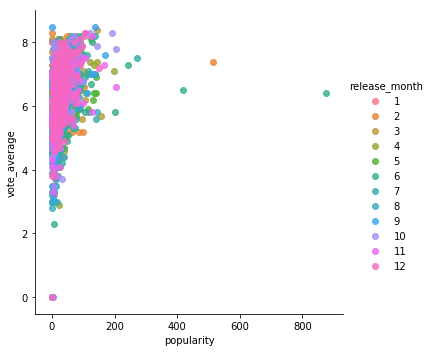

In [15]:
sns.lmplot(x='popularity', y='vote_average', data=df,fit_reg=False, hue='release_month')

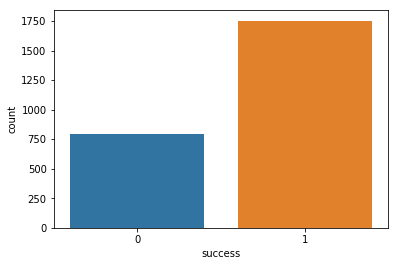

In [16]:
ax = sns.countplot(x="success", data=df)
plt.rcParams['figure.figsize'] = (100,10)

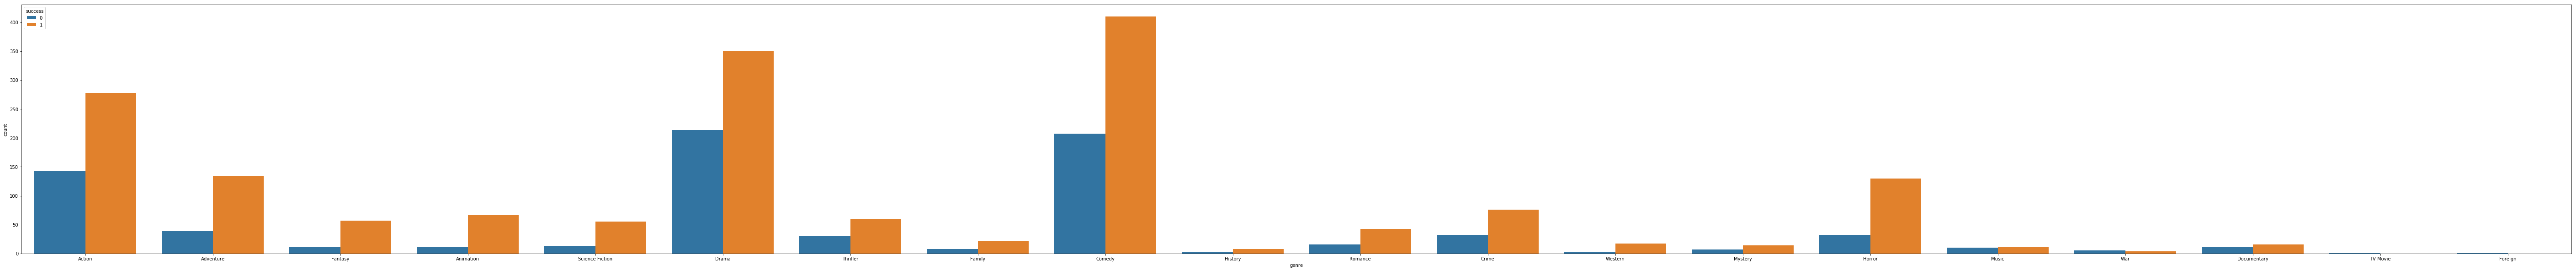

In [17]:
sns.countplot(x="genre", hue="success", data=df)
plt.rcParams['figure.figsize'] = (50,20)

D:\School\Spring2019\IntroPython\PythonInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


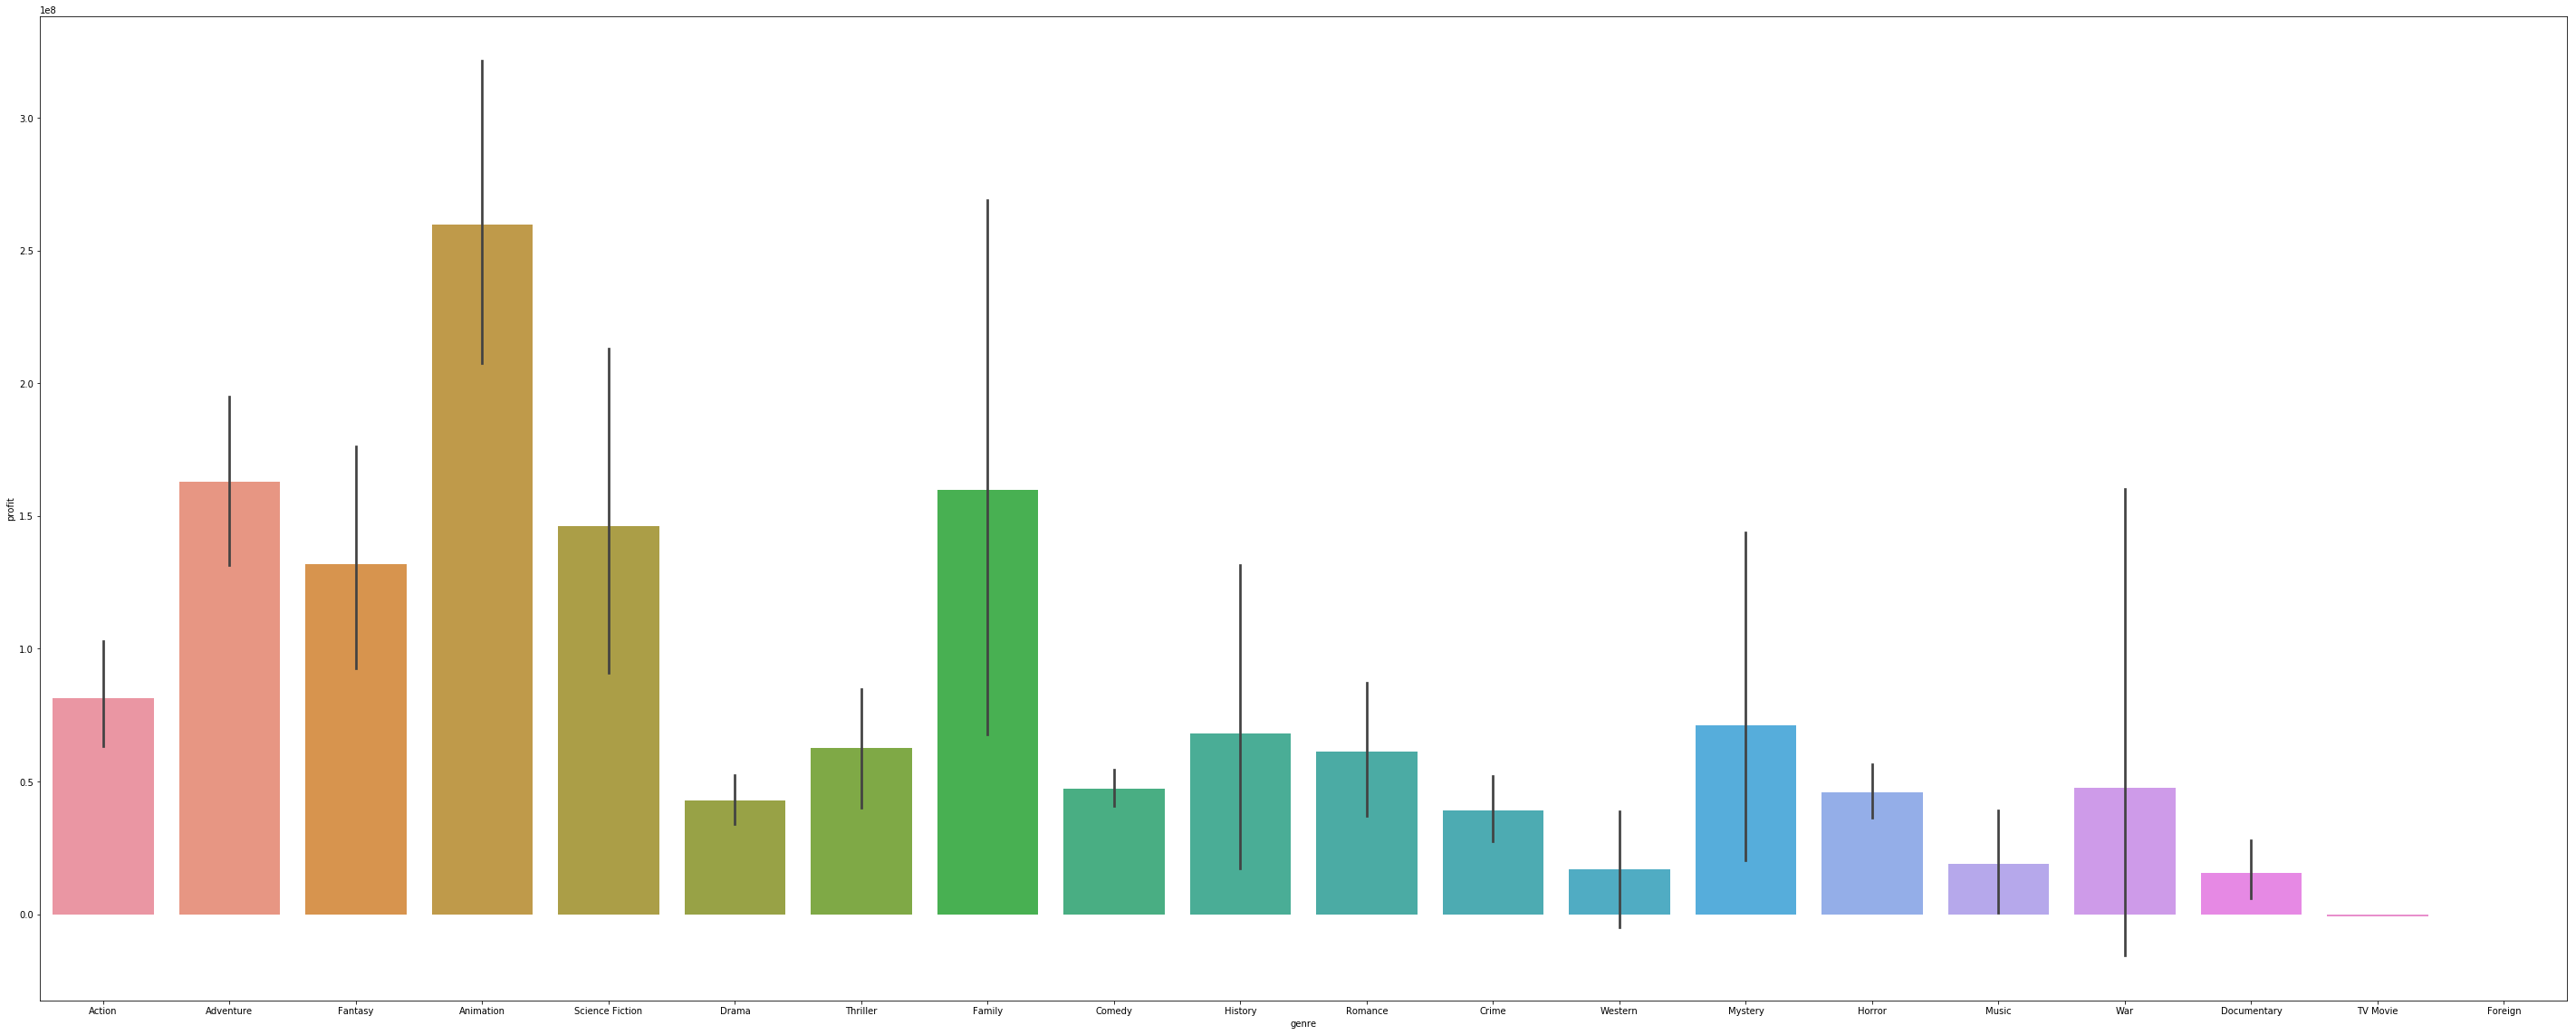

In [18]:
sns.barplot(x="genre", y="profit", data=df)
plt.rcParams['figure.figsize'] = (50,20)

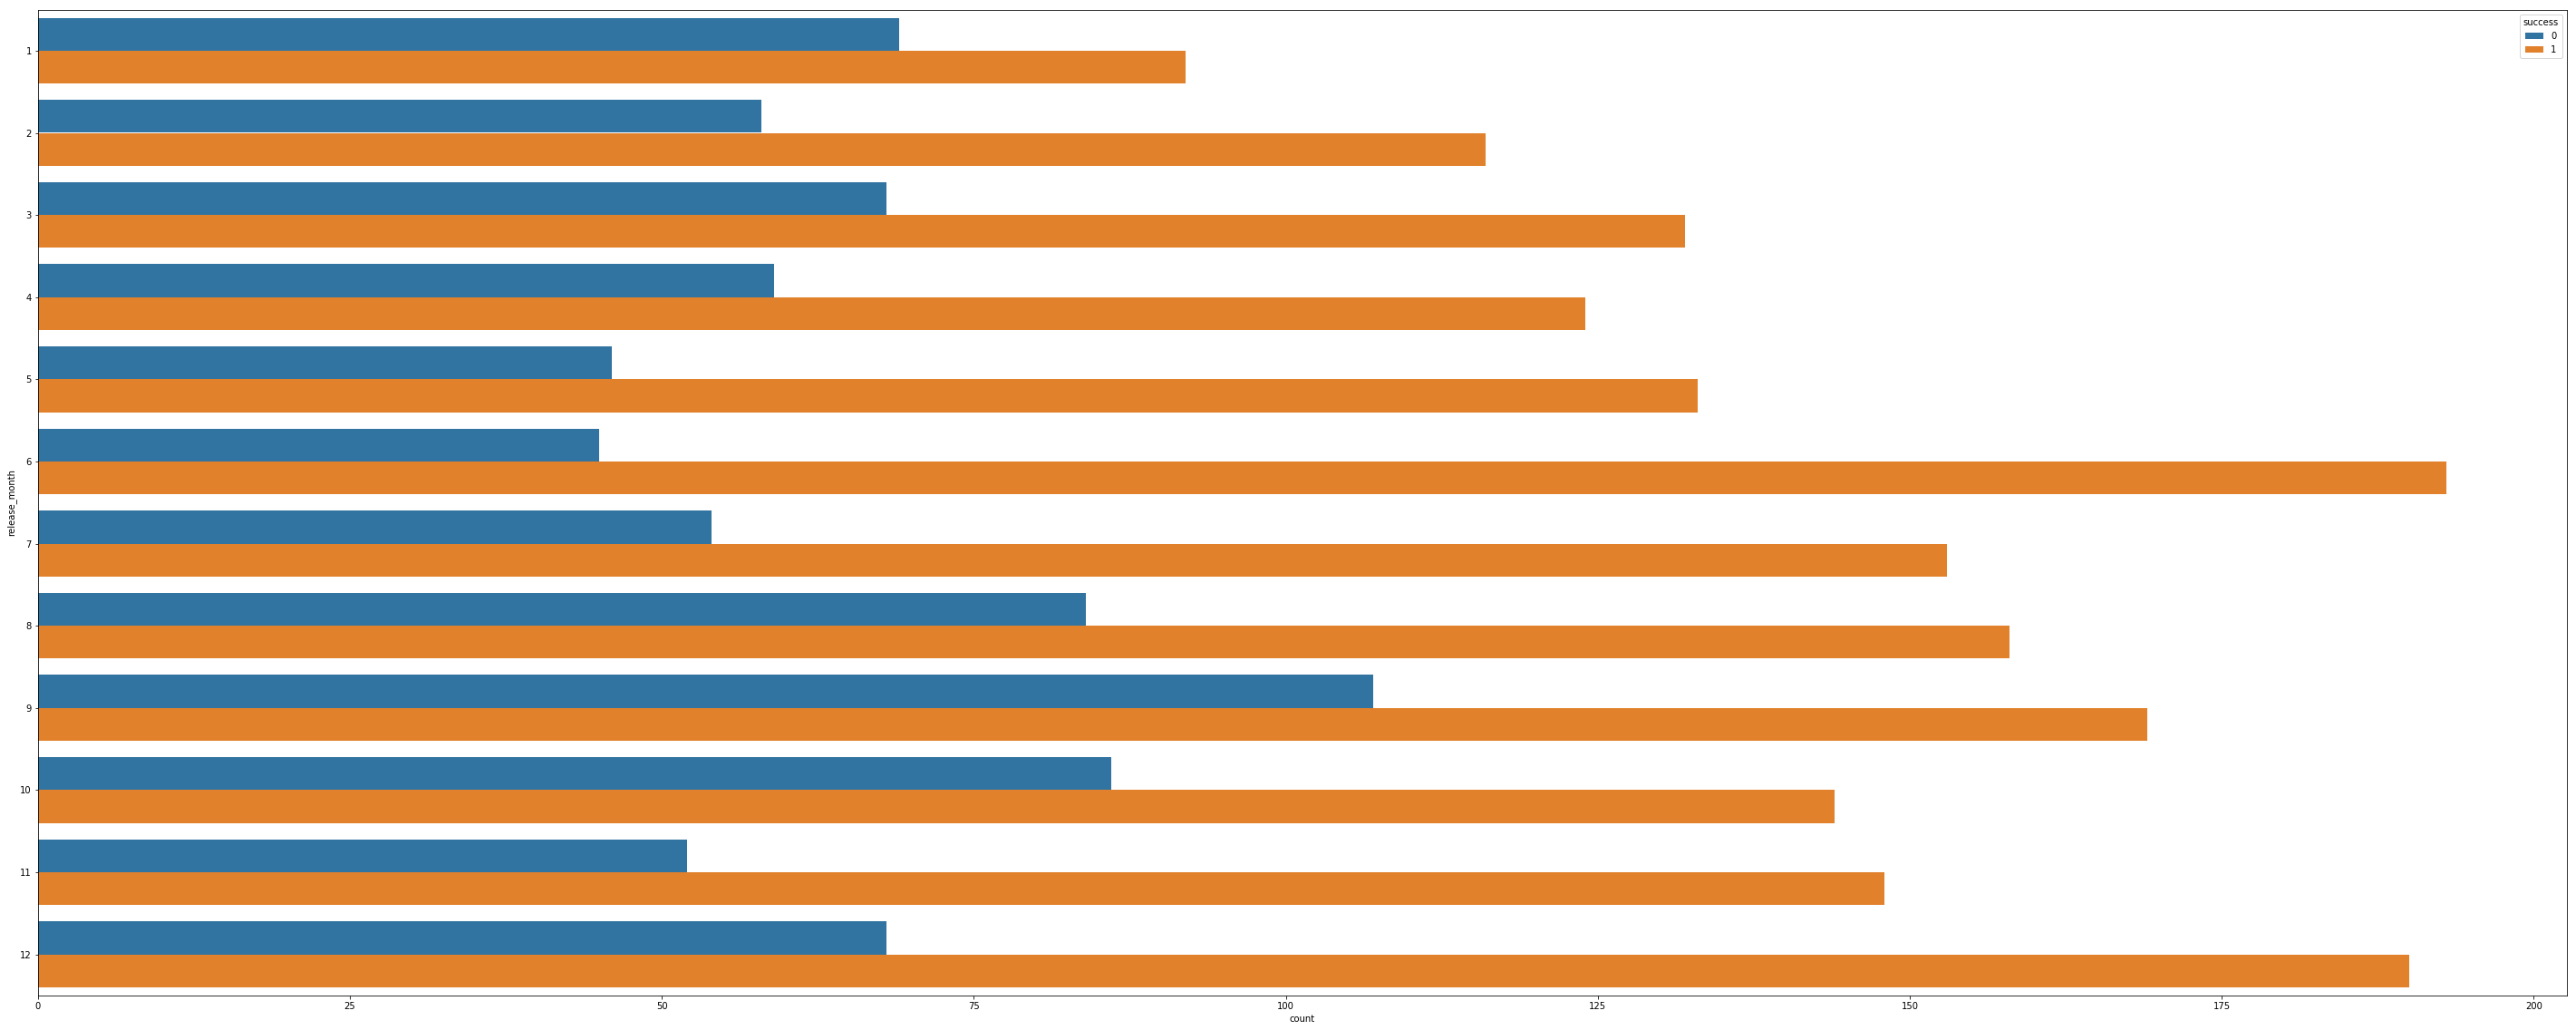

In [19]:
sns.countplot(y="release_month", hue="success", data=df)
plt.rcParams['figure.figsize'] = (50,20)

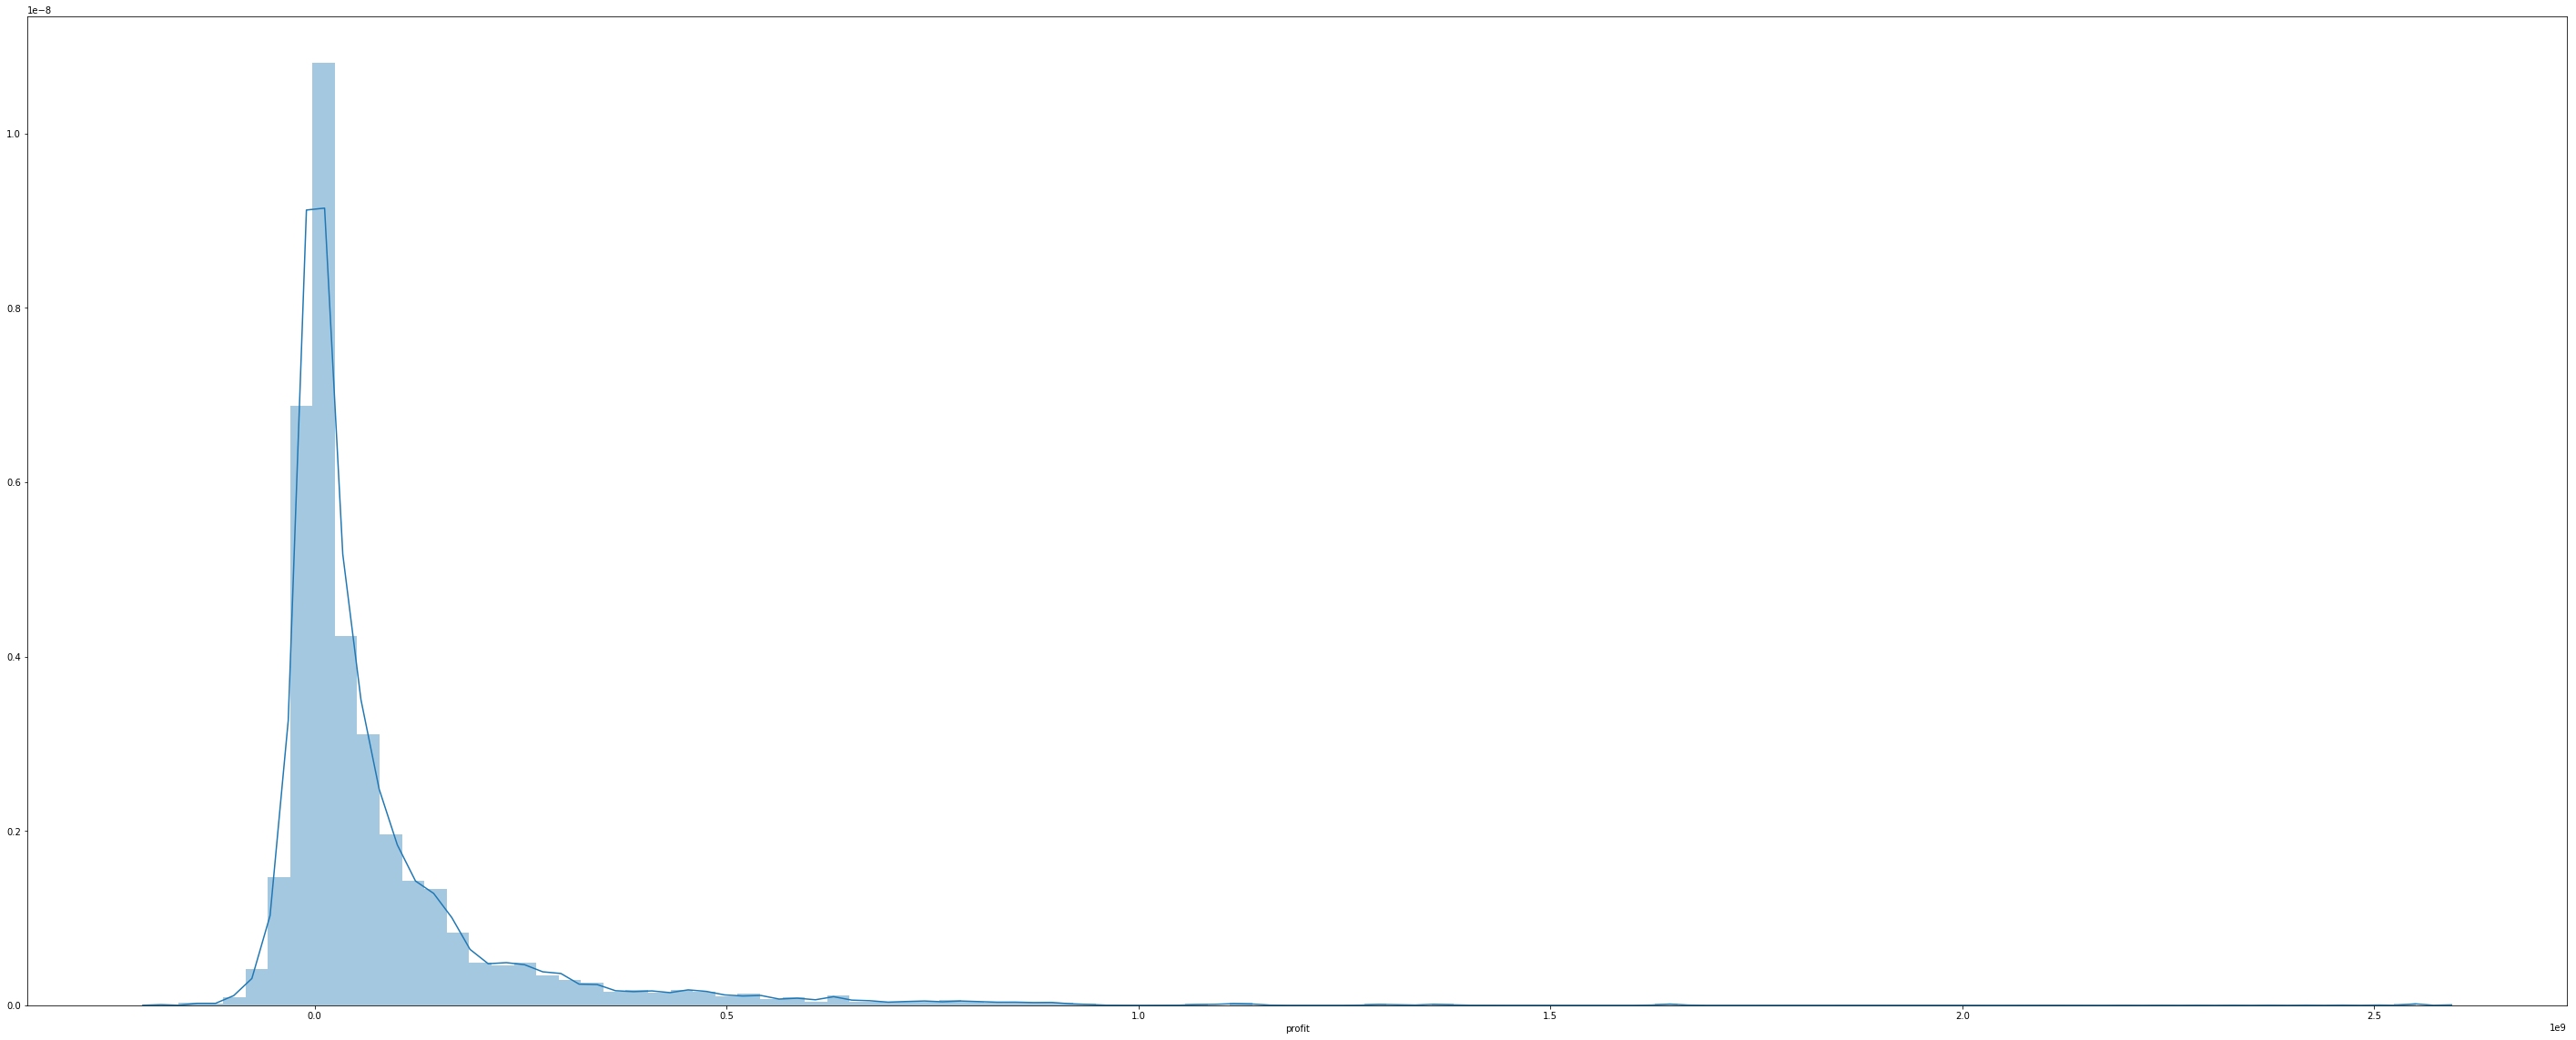

In [20]:
sns.distplot(df['profit'],bins=100)

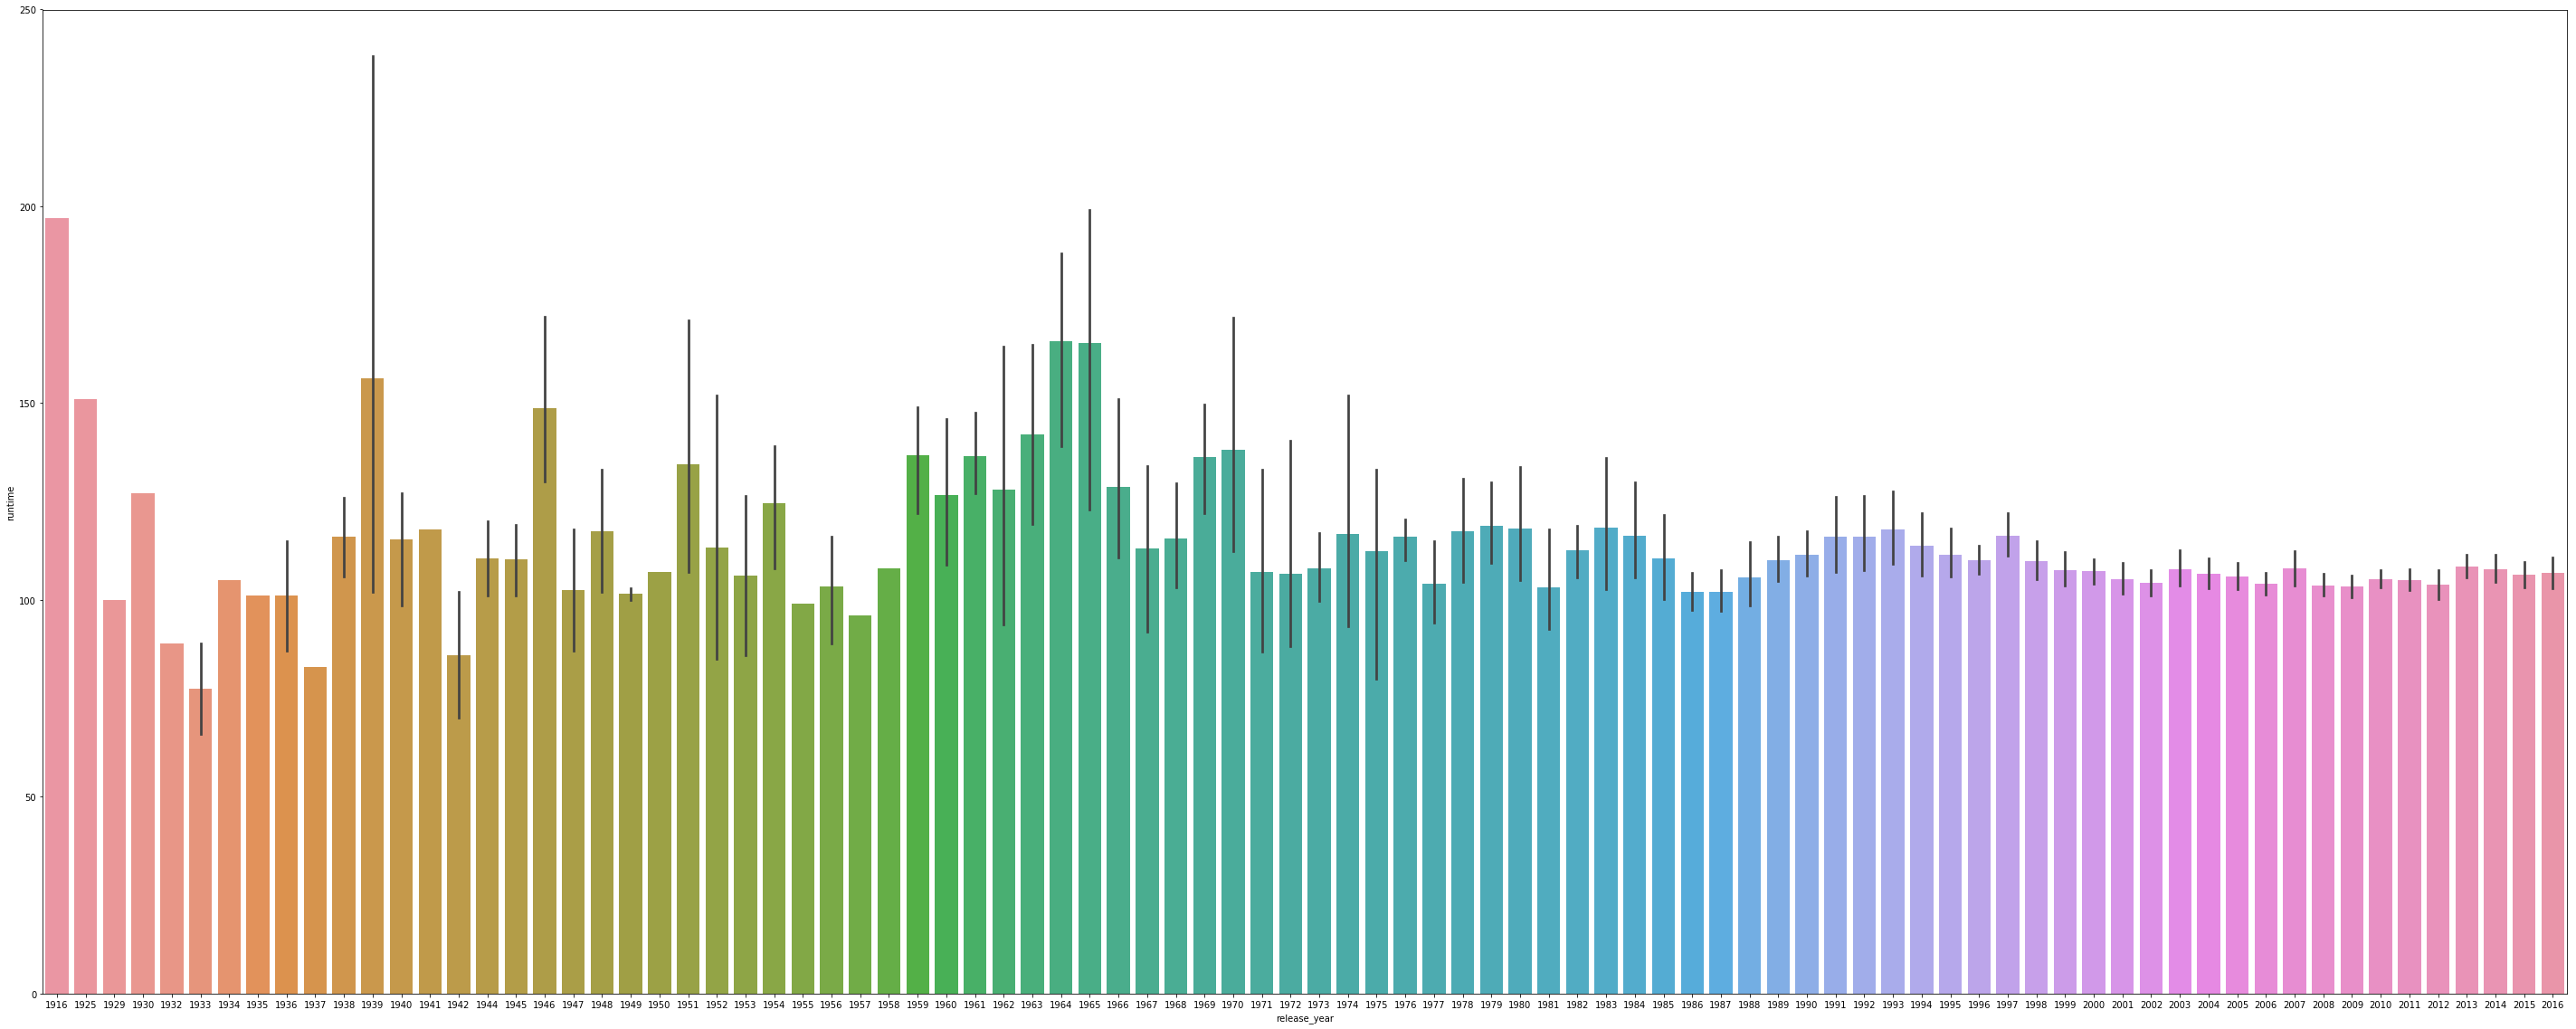

In [21]:
ax = sns.barplot(x="release_year", y="runtime", data=df)

In [22]:
df.head(1)

,movie_id,title,movie_title_length,character_name,cast_gender,actor_name,genre,keywords,overview,popularity,production_company,release_month,release_year,runtime,tagline,vote_average,vote_count,budget,revenue,profit,profit_margin,success
0,19995,Avatar,6,Jake Sully,2.0,Sam Worthington,Action,culture clash,"In the 22nd century, a paraplegic Marine is di...",150,Ingenious Film Partners,12,2009,162,Enter the World of Pandora.,7.2,11800,237000000,2787965087,2550965087,11.76,1


In [23]:
df[df.columns[1:]].corr()['success'][:]

movie_title_length    0.036305
cast_gender           0.089069
popularity            0.310368
release_month         0.030457
release_year         -0.105904
runtime               0.135856
vote_average          0.296208
vote_count            0.338779
budget                0.170795
revenue               0.366980
profit                0.382050
profit_margin         0.014882
success               1.000000
Name: success, dtype: float64

In [24]:
x = df.drop(columns=['success','cast_gender','movie_id','title','movie_title_length','character_name','actor_name',
                     'genre','keywords','overview','production_company','tagline'])

In [25]:
x[(x != 0).all(1)]
x.fillna(x.mean())

,popularity,release_month,release_year,runtime,vote_average,vote_count,budget,revenue,profit,profit_margin
0,150,12,2009,162,7.2,11800,237000000,2787965087,2550965087,11.76
1,139,5,2007,169,6.9,4500,300000000,961000000,661000000,3.20
2,112,7,2012,165,7.6,9106,250000000,1084939099,834939099,4.34
3,44,3,2012,132,6.1,2124,260000000,284139100,24139100,1.09
4,116,5,2007,139,5.9,3576,258000000,890871626,632871626,3.45
5,49,11,2010,100,7.4,3330,260000000,591794936,331794936,2.28
6,134,4,2015,141,7.3,6767,280000000,1405403694,1125403694,5.02
7,156,3,2016,151,5.7,7004,250000000,873260194,623260194,3.49
8,58,6,2006,154,5.4,1400,270000000,391081192,121081192,1.45
9,49,7,2013,149,5.9,2311,255000000,89289910,-165710090,0.35


In [26]:
np.where(np.isnan(x)) 
x.set_index('popularity')

,release_month,release_year,runtime,vote_average,vote_count,budget,revenue,profit,profit_margin
popularity,,,,,,,,,
150,12,2009,162,7.2,11800,237000000,2787965087,2550965087,11.76
139,5,2007,169,6.9,4500,300000000,961000000,661000000,3.20
112,7,2012,165,7.6,9106,250000000,1084939099,834939099,4.34
44,3,2012,132,6.1,2124,260000000,284139100,24139100,1.09
116,5,2007,139,5.9,3576,258000000,890871626,632871626,3.45
49,11,2010,100,7.4,3330,260000000,591794936,331794936,2.28
134,4,2015,141,7.3,6767,280000000,1405403694,1125403694,5.02
156,3,2016,151,5.7,7004,250000000,873260194,623260194,3.49
58,6,2006,154,5.4,1400,270000000,391081192,121081192,1.45


In [27]:
x.head(1)

,popularity,release_month,release_year,runtime,vote_average,vote_count,budget,revenue,profit,profit_margin
0,150,12,2009,162,7.2,11800,237000000,2787965087,2550965087,11.76


In [28]:
y = df['success'].values

In [29]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
knn.predict(x_test)[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [34]:
knn.score(x_test, y_test)

0.9862745098039216

In [35]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [36]:
cv_scores = cross_val_score(knn_cv, x, y, cv=5)

In [44]:
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.92367906 0.9372549  0.96660118 0.96660118 0.91159136]
cv_scores mean:0.9411455351578422
